In [1]:
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from scipy.sparse.csgraph import shortest_path
from scipy.linalg import eigh
from sklearn import manifold
from sklearn.datasets import fetch_openml


In [2]:
IRIS = True
MNIST = False

if IRIS:
    titre ='t-SNE - IRIS'
    iris = datasets.load_iris()
    X = iris.data  
    y = iris.target
    
    N = X.shape[0]
    n_components = 2
    n_neighbors = 4
    
elif MNIST:
    titre = 't-SNE - MNIST'
    digits = datasets.load_digits(n_class=6)
    X = digits.data
    y = digits.target
    
    N = X.shape[0]
    n_components = 2
    n_neighbors = 40

**Etape 1: construire un graphe des voisins,**
1. pour chaque point Xi! , déterminer ses kPPV
2. chaque nœud est connecté à ses kPPV
3. les arrêtes de poids non-nuls prennent comme valeurs la distance euclidienne
entre les 2 nœuds

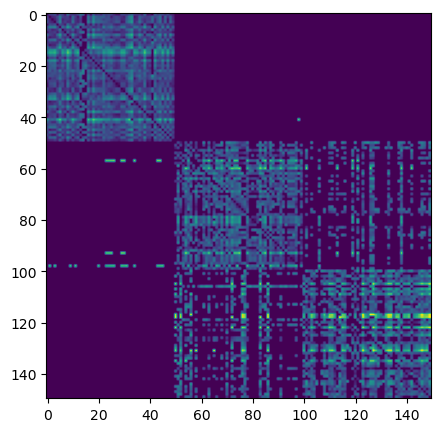

In [3]:
n_neighbors = 47
kng = kneighbors_graph(X, n_neighbors,mode='distance')
kng.nnz

# kng = 0.5*(kng+kng.T) # podemos parametrizar para tornar kng simetrico

plt.figure(figsize=(5,5))
plt.imshow(kng.todense())
# plt.imshow(kng.todense()[:50,:50])

**Etape 2: calcule des distances géodésiques entre les points**
1. pour tous les points, déterminer leur distance "géodésique" comme le plus court
chemin sur le graphe (algo. de Floyd algo. de Dijkstra)

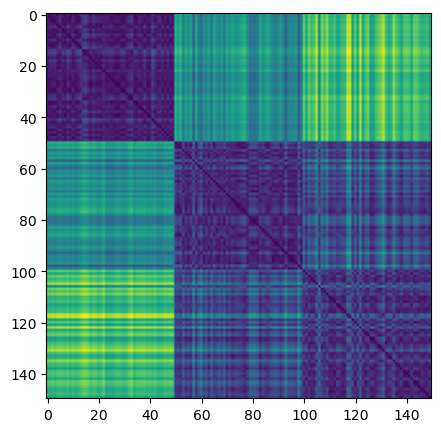

In [4]:
D = shortest_path(kng,directed=False)
# D = graph_shortest_path(kng,directed=False) #coloca true se nao simetrico
plt.figure(figsize=(5,5))
plt.imshow(D)

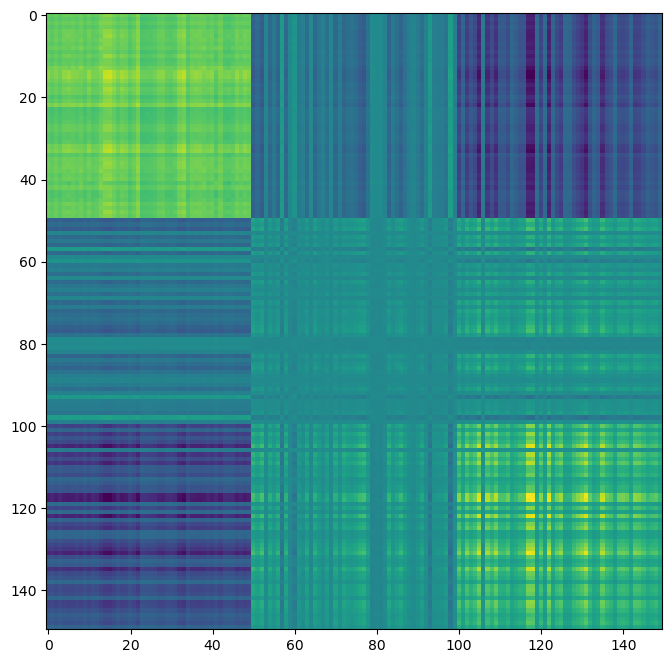

C:\Users\ferna\AppData\Local\Temp\ipykernel_24128\2479974277.py:14: RuntimeWarning: invalid value encountered in sqrt
  Y_iso = np.fliplr(V[:,-2:] @ np.diag(v[:2]**0.5))


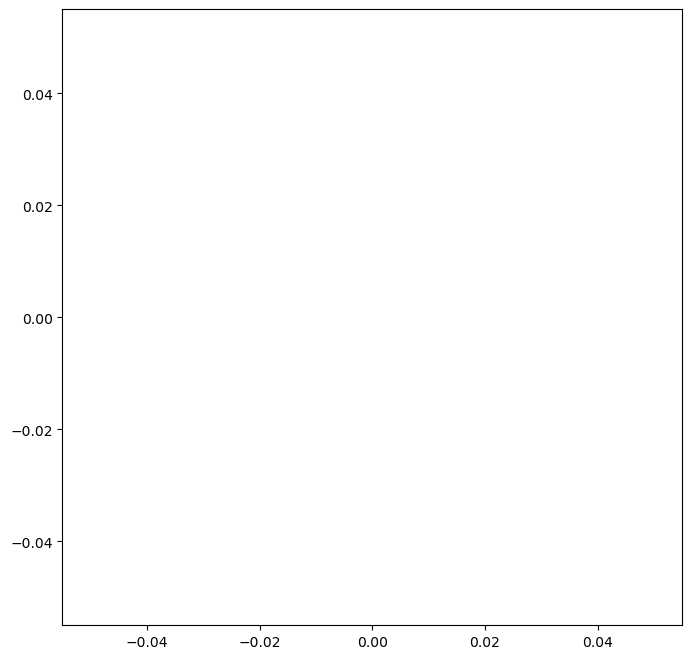

In [6]:
m = np.shape(X)[0]
Id = np.eye(m)
Ones = np.ones((m,m))

centrage = Id - (Ones/m)
B = -0.5 * (centrage) @ (D**2) @ (centrage)

plt.figure(figsize=(8,8))
plt.imshow(B)
plt.show()

[v,V] = eigh(B) # sao criados em ordem crescente

Y_iso = np.fliplr(V[:,-2:] @ np.diag(v[:2]**0.5))
fig,ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(Y_iso[:,0],Y_iso[:,1], c = y[0:m],cmap = plt.cm.Set1)
# legend1 = ax.legend(*scatter.legend_elements(),loc = "upper right",title= "nuage de points")
# ax.add_artist(legend1)

plt.show()

(1000, 784)


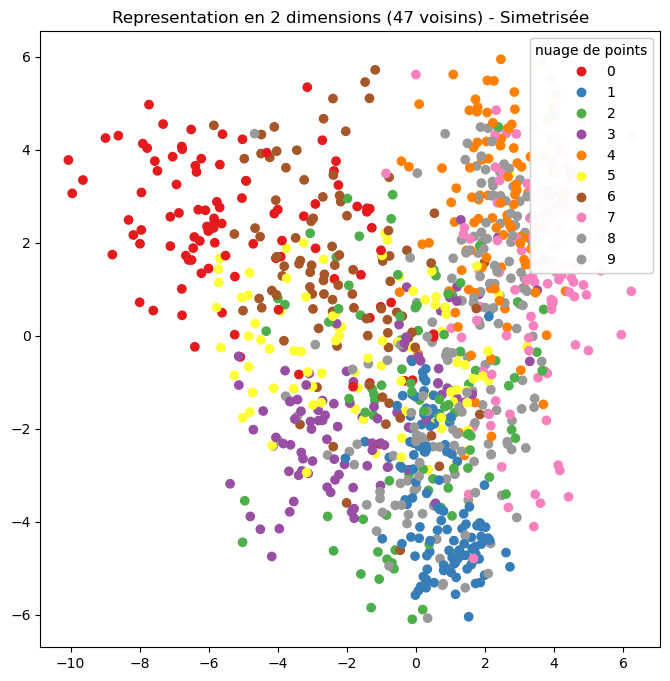

In [63]:
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from scipy.sparse.csgraph import shortest_path
from scipy.linalg import eigh
from sklearn import manifold
from sklearn.datasets import fetch_openml


# Etape 1: construire un graphe des voisins
def Etape1(X, n_neighbors):
    kng = kneighbors_graph(X, n_neighbors,mode='distance')

    kng = 0.5*(kng+kng.T) # podemos parametrizar para tornar kng simetrico
    # print('Non zero values:',kng.nnz)

    # # Matrice des plus proches voisins
    # plt.figure(figsize=(8,8))
    # plt.imshow(kng.todense()) 
    # plt.title("Matrice des plus proches voisins")
    # plt.show() 
    
    # # "Zoom" sur les 50 premiers
    # plt.figure(figsize=(8,8))
    # plt.imshow(kng.todense()[:50,:50])
    # plt.title("Zoom sur la Matrice des plus proches voisins (50 premiers points)")
    # plt.show() 
    
    return kng
    
# Etape 2: calcule des distances géodésiques entre les points
def Etape2(kng):
    D = shortest_path(kng,directed=True)
    
    # plt.figure(figsize=(8,8))
    # plt.title("Matrice des Distances Geodesiques")
    # plt.imshow(D)
    # plt.show()
    
    return D
    
    
# Etape 3: construire l'embedding de basse dimension à partir des distances géodésiques
def Etape3(D, n_neighbors):
    m = np.shape(X)[0]
    Id = np.eye(m)
    Ones = np.ones((m,m))
    C = y[0:m].astype(float)
    
    centrage = Id - (Ones/m)
    B = -0.5 * (centrage) @ (D**2) @ (centrage)

    # plt.figure(figsize=(8,8))
    # plt.imshow(B)
    # plt.title("Matrice des Similarités")
    # plt.show()

    [v,V] = eigh(B) # sao criados em ordem crescente

    Y_iso = np.fliplr(V[:,-2:] @ np.diag(v[-2:]**0.5))
    fig,ax = plt.subplots(figsize=(8,8))
    scatter = ax.scatter(Y_iso[:,0],Y_iso[:,1], c = C,cmap = plt.cm.Set1)
    plt.title("Representation en 2 dimensions ({} voisins) - Simetrisée".format(n_neighbors))
    legend1 = ax.legend(*scatter.legend_elements(),loc = "upper right",title= "nuage de points")
    ax.add_artist(legend1)

    plt.show()
    
# Comparer les résultats à ceux obtenus avec scikitlearn 
def CompScikt(X, y, n_neighbors):
    n_components = 2
    m = np.shape(X)[0]
    C = y[0:m].astype(float)
    
    X_iso = manifold.Isomap(n_neighbors = n_neighbors , n_components = n_components,path_method='D').fit_transform(X)
    fig,ax = plt.subplots(figsize=(8,8))
    scatter = ax.scatter(X_iso[:,0],X_iso[:,1], c = C,cmap = plt.cm.Set1)
    plt.title("Representation en 2 dimensions ({} voisins) - ScikitLearn".format(n_neighbors))
    legend1 = ax.legend(*scatter.legend_elements(),loc = "upper right",title= "nuage de points")
    ax.add_artist(legend1)
    plt.show()
    
# Visualiser le résultat d’ISOMAP sur IRIS
# Déterminer l’influence du nombre de voisins sur les résultats obtenus.
# n_neighbors_list = np.linspace(47, 60, 3, dtype=int)

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# for n_neighbors in n_neighbors_list:
#     print(f'\nProcessando para n_neighbors = {n_neighbors}')
#     kng = Etape1(X, n_neighbors)
#     D = Etape2(kng)
#     Etape3(D, n_neighbors)
#     # CompScikt(X, y, n_neighbors)
   
    
# Visualiser le résultat d’ISOMAP sur MNIST    
n_neighbors = 47

dMNIST = fetch_openml("mnist_784", version=1, as_frame=False)
X = dMNIST.data[:1000]
y = dMNIST.target[:1000]
X = (X - np.min(X, axis=0)) / (np.ptp(X, axis=0) + 1e-6)
print(np.shape(X))

kng = Etape1(X, n_neighbors)
D = Etape2(kng)
Etape3(D, n_neighbors)
